In [1]:
import pandas

In [2]:
df = pandas.read_csv('Wine.csv')

In [3]:
df.head()

,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
def check_df(dataframe, head=5): #EDA 
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

##################### Shape #####################
(1143, 13)
##################### Types #####################
fixed acid               float64
volatile acid            float64
citric acid              float64
residual sugar           float64
chlorid                  float64
free sulfur dioxide      float64
sum of sulfur dioxide    float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
Id                         int64
dtype: object
##################### Head #####################
   fixed acid  volatile acid  citric acid  residual sugar  chlorid  \
0         7.4           0.70         0.00             1.9    0.076   
1         7.8           0.88         0.00             2.6    0.098   
2         7.8           0.76         0.04             2.3    0.092   
3        11.2           0.28         0.56             1.9    0.075   
4         7.4           0.70         0.00      

In [6]:
# checking that is there any miss value?
train_data = df
train_data.isnull().sum()
# the results looks clear(there are no any miss values)



fixed acid               0
volatile acid            0
citric acid              0
residual sugar           0
chlorid                  0
free sulfur dioxide      0
sum of sulfur dioxide    0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
Id                       0
dtype: int64

In [7]:
# dropped id column because it is unnecessary
df = df.drop(columns=['Id'],axis = True)

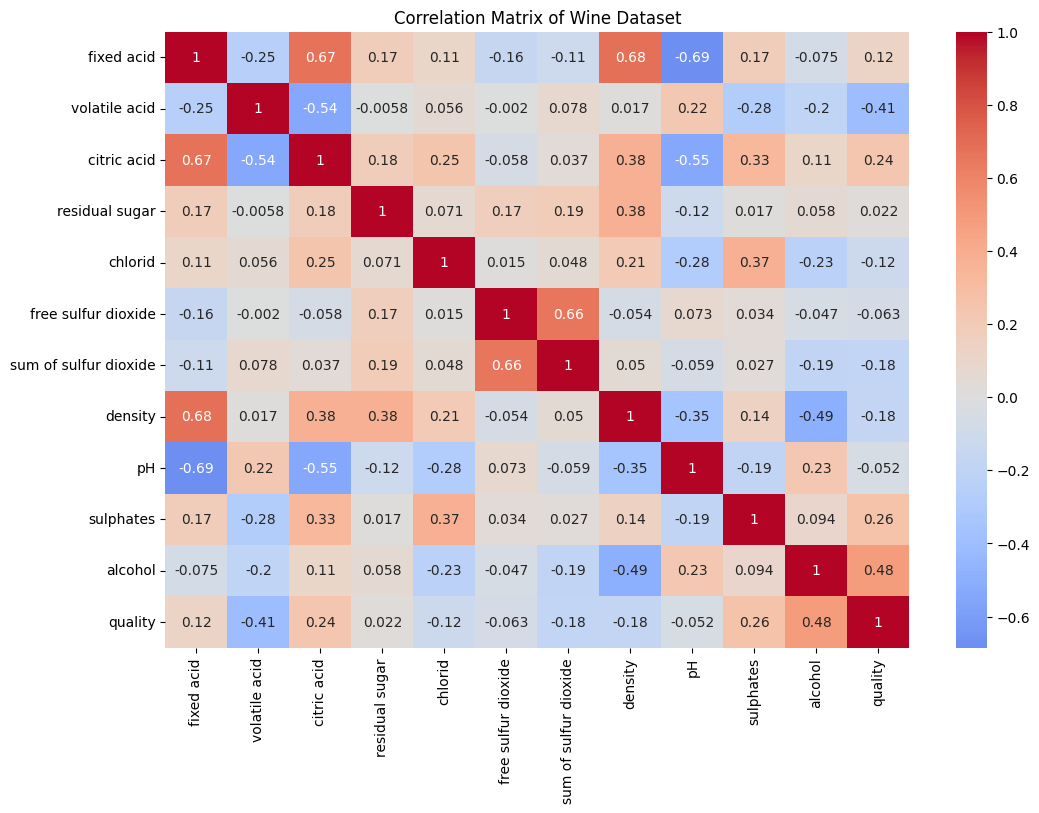

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Dataset')
plt.show()

In [9]:
# time to predict

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

X = df.drop(['quality'], axis=1) 
y = df['quality']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# my models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# fitting models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[model_name] = rmse

# reuslts
for model_name, rmse in results.items():
    print(f'{model_name} RMSE: {rmse}')

# the best one
best_model_name = min(results, key=results.get)
best_rmse = results[best_model_name]
print(f'\nBest Model: {best_model_name} with RMSE: {best_rmse}')

Linear Regression RMSE: 0.6164677203737233
Random Forest RMSE: 0.5456893400967225
Gradient Boosting RMSE: 0.575024124455717

Best Model: Random Forest with RMSE: 0.5456893400967225


In [11]:
# so the best model is Random FOrest let go deeper
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

0.6986899563318777
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229



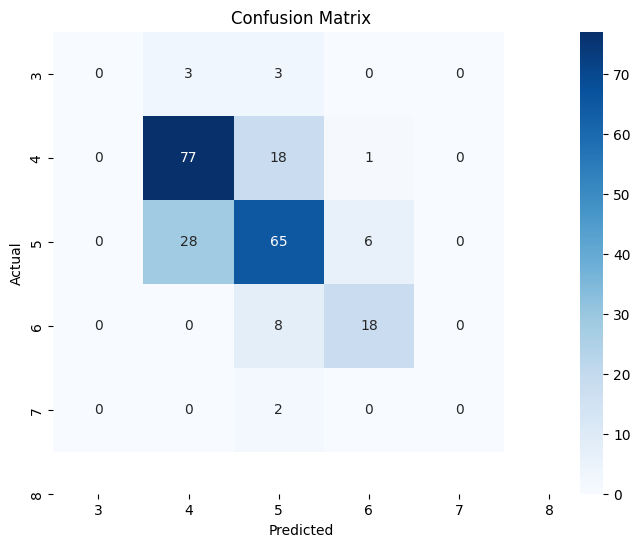

In [12]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
